 

<div align="Center"> 
    
### Topic: Binary Option (Cash or nothing)
    
<br/>    
<br/>
<div align="center"> Comapany Name:
    
| <div align="center">  **Amazon**  </div>   | 
| ------             |   
| Source: Yahoofinance |  
| Ticker: AMZN |      
    
   
    
</div>
<br/>
<br/>
<br/>

In [1]:
# Importing packages
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
import pandas as pd
import yfinance as yf
import datetime as dt
from scipy.stats import norm
from random import gauss
from math import exp, sqrt
from scipy.stats import norm
from math import log
from statsmodels.tsa.stattools import adfuller


In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Amazon.com inc. is an international tech giant company which focuses on e-commerce, cloud computing, artificial intelligence and digital streaming.  It was founded from a garage on July 5, 1994 in Bellevue, Washington (America) by Jeff Bezos (CEO). The company total assets US$321.2 billion(2020). The number of employees 1298000 (Dec. 2020).

In [3]:
#Import data from yahoo finance and converted the date into euros
Amazon_1year = yf.download('AMZN', data_source='yahoo', start='2020-06-30', end= '2021-06-30')

Amazon_2year = yf.download('AMZN', data_source='yahoo', start='2019-06-30', end= '2021-06-30')

Amazon_5year = yf.download('AMZN', data_source='yahoo', start='2016-06-30', end= '2021-06-30')


Amazon_1year = pd.DataFrame({ 'Amazon1' :
Amazon_1year['Adj Close'][Amazon_1year.index > dt.datetime(2020, 1, 1)]}) 


Amazon_2year = pd.DataFrame({ 'Amazon2' :
Amazon_2year['Adj Close'][Amazon_2year.index > dt.datetime(2019, 1, 1)]})  

Amazon_5year = pd.DataFrame({ 'Amazon5' :
Amazon_5year['Adj Close'][Amazon_5year.index > dt.datetime(2016, 1, 1)]})  


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
amazon_data_set = [Amazon_1year, Amazon_2year, Amazon_5year]

In [5]:
[amazon_data_set[i].tail() for i in range(0, 3)] # Generator to list up all data set tail

[                Amazon1
 Date                   
 2021-06-23  3503.820068
 2021-06-24  3449.080078
 2021-06-25  3401.459961
 2021-06-28  3443.889893
 2021-06-29  3448.139893,
                 Amazon2
 Date                   
 2021-06-23  3503.820068
 2021-06-24  3449.080078
 2021-06-25  3401.459961
 2021-06-28  3443.889893
 2021-06-29  3448.139893,
                 Amazon5
 Date                   
 2021-06-23  3503.820068
 2021-06-24  3449.080078
 2021-06-25  3401.459961
 2021-06-28  3443.889893
 2021-06-29  3448.139893]

## Geometric Brownian Motion

Geometric Brownian motion is a widely used mathematical model for asset prices with the assumption of their constant volatilities. It is a continuous-time process where the price (or returns) of the asset / shares / investment can be modelled as a random walk (I.e a process where changes in stock prices have the same distribution and are independent of each other. )

The properties of Geometric Brownian motion:

    The distribution in Geometric Brownian motion is stationary in nature.
    
    The logarithmic change of the stock price is normally distributed

    The volatility (i.e Standard Deviation of the Log Returns) of the stock price is constant

    Expected return (i.e Mean of the Log Returns) is independent of to stock performance

Therefore we are gonna test these assumptions holds true.


## Analyses geometric brownian motion properties

Text(0, 0.5, 'AdjClose')

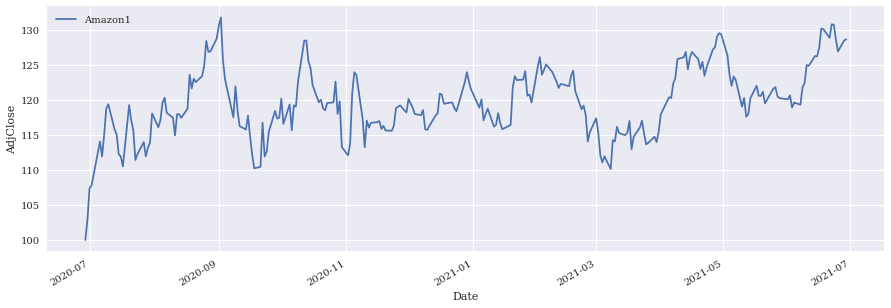

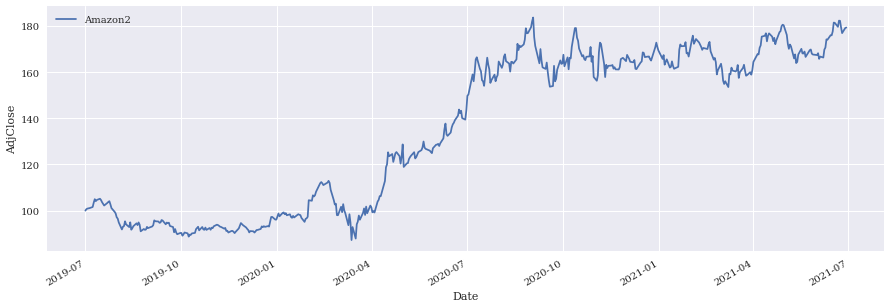

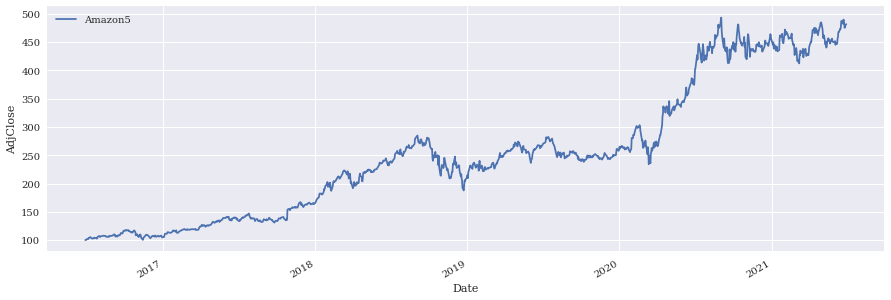

In [6]:
#Show the graphs for amazon one year,2years and 5years data set
(Amazon_1year/Amazon_1year.iloc[0]*100).plot(figsize=(15, 5));
plt.ylabel('AdjClose')
(Amazon_2year/Amazon_2year.iloc[0]*100).plot(figsize=(15, 5));
plt.ylabel('AdjClose')
(Amazon_5year/Amazon_5year.iloc[0]*100).plot(figsize=(15, 5));
plt.ylabel('AdjClose')

## Geometric Brownian Motion

Geometric Brownian motion is a widely used mathematical model for asset prices with the assumption of their constant volatilities. It is a continuous-time process where the price (or returns) of the asset / shares / investment can be modelled as a random walk (I.e a process where changes in stock prices have the same distribution and are independent of each other. )

The properties of Geometric Brownian motion:

    The distribution in Geometric Brownian motion is stationary in nature.
    
    The logarithmic change of the stock price is normally distributed

    The volatility (i.e Standard Deviation of the Log Returns) of the stock price is constant

    Expected return (i.e Mean of the Log Returns) is independent of to stock performance

Therefore we are gonna test these assumptions holds true.


## Analyses geometric brownian motion properties

## Testing of Stationarity

#Ho: It is non-stationary

#H1: It is stationary

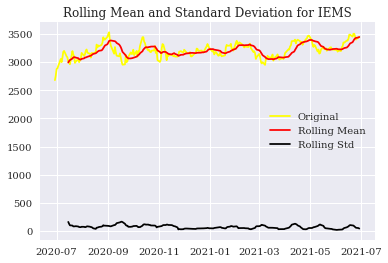

Results of dickey fuller test
Test Statistics                 -3.263768
p-value                          0.016578
No. of lags used                 9.000000
Number of observations used    243.000000
critical value (1%)             -3.457551
critical value (5%)             -2.873509
critical value (10%)            -2.573148
dtype: float64


In [7]:
# making data stationary

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation for IEMS')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(Amazon_1year)

The test statistics is greater than the critical values.
So, the data is non-stationary.

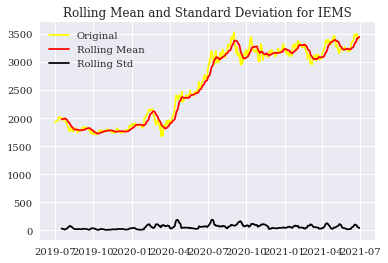

Results of dickey fuller test
Test Statistics                 -0.546894
p-value                          0.882536
No. of lags used                 3.000000
Number of observations used    500.000000
critical value (1%)             -3.443496
critical value (5%)             -2.867338
critical value (10%)            -2.569858
dtype: float64


In [8]:
# making data stationary for two years 
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation for IEMS')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(Amazon_2year)

The test statistics is greater than the critical values.
So, the data is non-stationary.

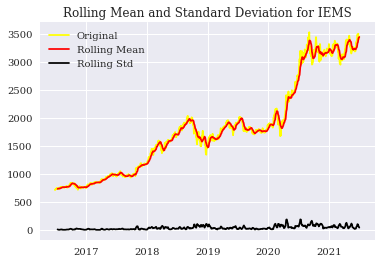

Results of dickey fuller test
Test Statistics                   0.103654
p-value                           0.966310
No. of lags used                 18.000000
Number of observations used    1240.000000
critical value (1%)              -3.435635
critical value (5%)              -2.863874
critical value (10%)             -2.568012
dtype: float64


In [9]:
# making data stationary for five years data
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation for IEMS')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(Amazon_5year)

The test statistics is greater than the critical values.
So, the data is non-stationary.

Therefore, for all three distributions, the Geometric Brownian Motion is not followed.

In [10]:
# Computing the log returns of the given data sets

log_returns_1 = np.log(Amazon_1year / Amazon_1year.shift(1)).dropna()


log_returns_2 = np.log(Amazon_2year / Amazon_2year.shift(1)).dropna()


log_returns_5 = np.log(Amazon_5year / Amazon_5year.shift(1)).dropna()

log_returns = [log_returns_1, log_returns_2, log_returns_5]

In [11]:
[log_returns[i].head() for i in range(0, 3)]

[             Amazon1
 Date                
 2020-06-30  0.028845
 2020-07-01  0.042536
 2020-07-02  0.004022
 2020-07-06  0.056087
 2020-07-07 -0.018795,
              Amazon2
 Date                
 2019-07-02  0.006286
 2019-07-03  0.002422
 2019-07-05  0.002014
 2019-07-08  0.004832
 2019-07-09  0.018262,
              Amazon5
 Date                
 2016-06-30  0.000028
 2016-07-01  0.013960
 2016-07-05  0.003329
 2016-07-06  0.012977
 2016-07-07 -0.001411]

Text(0, 0.5, 'log_return(t)')

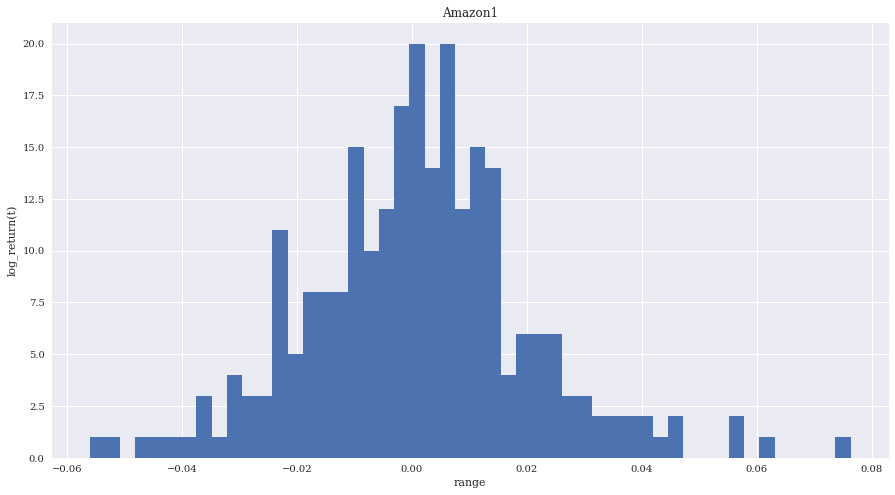

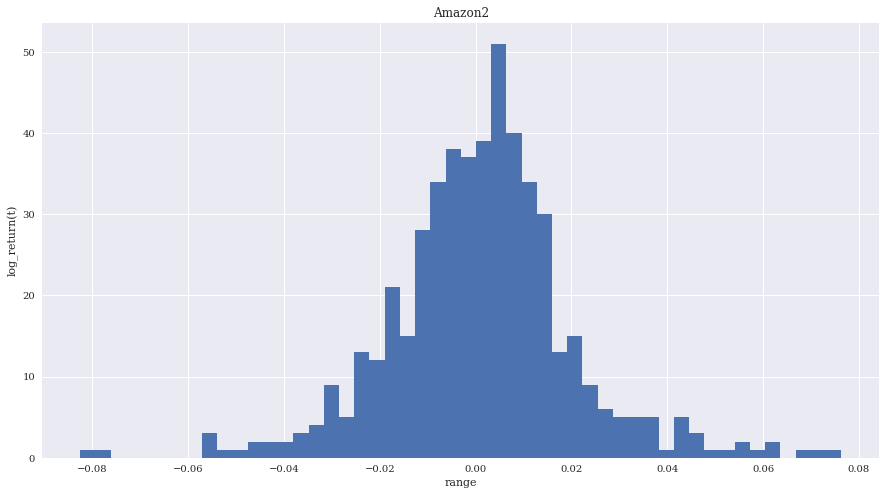

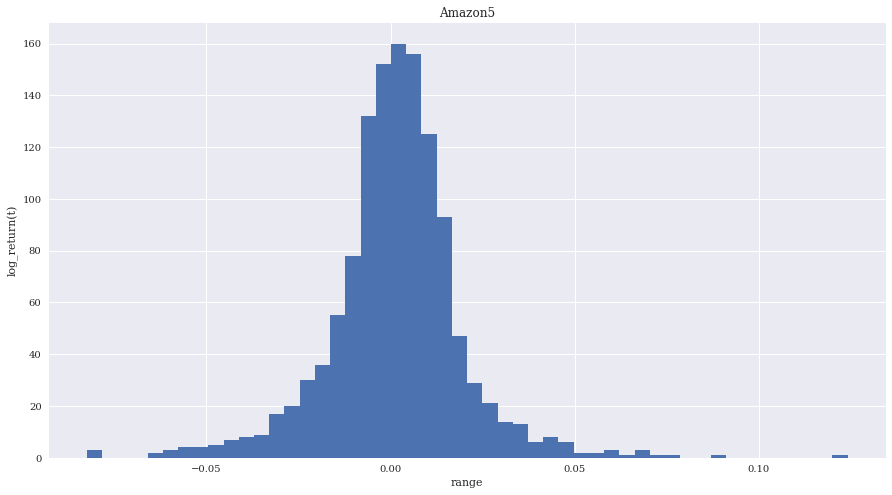

In [12]:
# log returns of the financial instruments as histograms:

log_returns_1.hist(bins=50, figsize=(15, 8));
plt.xlabel("range")
plt.ylabel('log_return(t)')
log_returns_2.hist(bins=50, figsize=(15, 8));
plt.xlabel("range")
plt.ylabel('log_return(t)')
log_returns_5.hist(bins=50, figsize=(15, 8));
plt.xlabel("range")
plt.ylabel('log_return(t)')

According to the above histogram, The logarithmic change of the stock price is not normally distributed as it is not symmetric, single peaked (unimodal) distribution.

Therefore, For all the distributions, the motion is not followed.

## Quantile-Quantile (QQ) plots

In [13]:
# Definining to Prints selected statistics.

def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))
    # Tests for normality distribution of given data set.

def normality_tests(arr):
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

Skew of data set          0.262
Skew test p-value          0.085
Kurt of data set          1.150
Kurt test p-value          0.005
Norm test p-value          0.004
     statistic           value
------------------------------
          size       252.00000
           min        -0.05600
           max         0.07631
          mean         0.00100
           std         0.01954
          skew         0.26232
      kurtosis         1.15006


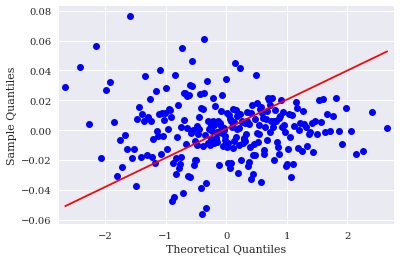

In [14]:
# Using Normality test, print Statistcs and QQplot  For 1 year

sm.qqplot(log_returns_1.dropna(), line='s');
normality_tests(log_returns_1) 
print_statistics(log_returns_1)

Skew of data set          0.064
Skew test p-value          0.552
Kurt of data set          2.338
Kurt test p-value          0.000
Norm test p-value          0.000
     statistic           value
------------------------------
          size       503.00000
           min        -0.08254
           max         0.07631
          mean         0.00116
           std         0.01957
          skew         0.06408
      kurtosis         2.33776


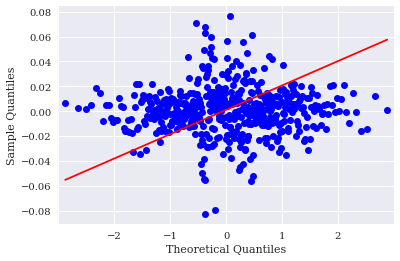

In [15]:
# Using Normality test, print Statistcs and QQplot  For 2 years

sm.qqplot(log_returns_2.dropna(), line='s');
normality_tests(log_returns_2) 
print_statistics(log_returns_2)

Skew of data set          0.096
Skew test p-value          0.163
Kurt of data set          4.417
Kurt test p-value          0.000
Norm test p-value          0.000
     statistic           value
------------------------------
          size      1258.00000
           min        -0.08254
           max         0.12413
          mean         0.00125
           std         0.01827
          skew         0.09603
      kurtosis         4.41684


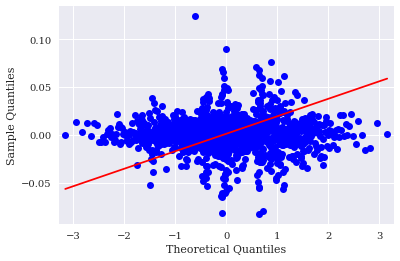

In [16]:
# Using Normality test, print Statistcs and QQplot  For 5 years

sm.qqplot(log_returns_5.dropna(), line='s');
normality_tests(log_returns_5) 
print_statistics(log_returns_5)

Interpretetion:

For all above Q-Q plots, the data is not normally distributed as the most of the points in the QQ-normal plot lies is not on a straight diagonal line.

The deviations from the straight line for most of the data are higher. So, it indicates that the distribution is not normal distribution.

The value of skewness and kurtosis is not close to 0, therefore, the distribution is not normally distributed.

The test values indicate that the log returns of the geometric Brownian motionare indeed is not normally distributed — they do not show p-values of 0.05 or above.

Therefore, For all the distributions, the motion is not followed.

In [17]:
# we have taken 255 days as our data consist of daily data

stdev_1 = log_returns_1.std() * 255 ** 0.5
stdev_2 = log_returns_2.std() * 255 ** 0.5
stdev_5 = log_returns_5.std() * 255 ** 0.5

print ("Amazon1: %4.3f" %(stdev_1)) 
print ("Amazon3: %4.3f" %(stdev_2))
print ("Amazon5: %4.3f" %(stdev_5)) 


Amazon1: 0.312
Amazon3: 0.313
Amazon5: 0.292


The mean ( expected return) and standard deviation ( volatility ) is not constant.  

## Geometric Brownian Motion 
We are using five years data of Amazon


In [18]:
u = log_returns_5.mean()


In [19]:
# Variance of log returns
var = log_returns_5.var()
var

Amazon5    0.000334
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [20]:
drift = u - (0.5 * var)

In [21]:
# stand divation of log returns

stdev = log_returns_5.std()

In [22]:
stdev

Amazon5    0.018274
dtype: float64

In [23]:
norm.ppf(0.95) # The distance between this event and the mean will be approximately 1.65 standard deviations.

1.6448536269514722

In [24]:
t_intervals = 100 # forecasting number of days
iterations = 20 #forecasting 20 future stock price

In [25]:
# computes the daily returns = e^r using numpy.exp and .rannd funtion

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

# this obtians 100 by 10 array daily returns, which is 10 sets of 100 random future stock prices.
daily_returns

array([[1.02280133, 1.0118647 , 1.03761528, ..., 1.00548749, 1.01705542,
        1.03049949],
       [1.00357669, 1.01505288, 0.98769088, ..., 1.00750693, 0.98296935,
        1.01171033],
       [0.98253102, 1.03572321, 0.9928161 , ..., 1.01321647, 1.00175578,
        0.9934418 ],
       ...,
       [0.98360408, 1.00711428, 0.97821724, ..., 0.97206846, 0.9936248 ,
        1.03256953],
       [1.00576891, 0.99463104, 0.99035534, ..., 0.99164304, 0.9842112 ,
        0.9887306 ],
       [1.05307144, 0.99577353, 0.99069133, ..., 0.98227587, 0.99997751,
        1.01794896]])

## Monte Carlo Simulation for Geometric Brownian Motion

In [26]:
# assigning first price in our list to last price of Amazon = So = Current market price

S0 = Amazon_5year.iloc[-1]

# The data is adjusted to big as daily returns array using .zeros_like() and fill it with zeros
# to replace expected stock price using a loop

price_list = np.zeros_like(daily_returns)

price_list[0] = S0

# setting a loop the begins in day 1 and ends day 100

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
    
  

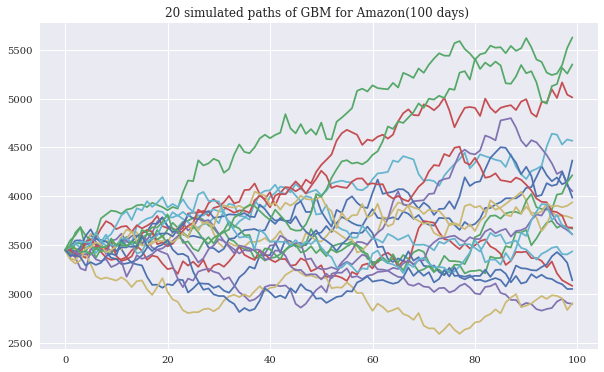

In [27]:
plt.figure(figsize=(10,6))
plt.title('20 simulated paths of GBM for Amazon(100 days) ')
plt.plot(price_list);

## Binary Option - Cash or Nothing

A cash-or-nothing call is an option that trades on currencies, commodities or OTC securities, and has a binary outcome. It pays out either a fixed amount, if the underlying stock exceeds a predetermined threshold or strike price, or pays out nothing. This kind of option is also known as a binary call or a digital call.



In [28]:
 def gbm(S, v, r, T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

def binary_call_payoff(K, S_T):
    if S_T >= K: return 1.0
    else:        return 0.0

In [29]:
stdev_5 = log_returns_5.std() * 255 ** 0.5
stdev_5

Amazon5    0.291806
dtype: float64

In [30]:
# parameters
S = 1747.73 # asset price
v = 0.29 # Volatility 
r = 0.025 # risk free rate of 2.5 % corresponding to a yeild of a 10 year gov bond(Bloomberg)
maturity = 0.5
K = 1480.00
# ATM strike
simulations = 50000   # 
payoffs = 0.0

# run simultaion
for i in range(simulations):
    S_T = gbm(S, v, r, maturity)
    payoffs += binary_call_payoff(K, S_T)

# find prices
option_price = exp(-r * maturity) * (payoffs / float(simulations))

print('Price: %.8f' % option_price)

Price: 0.76772323


## Black Sholes model formula
Binary options can also be priced using the traditional Black Scholes model, 

using the following formula:

C=e−rTN(d2)

Where N is the cumulative normal distribution function, and d2 is given by the standard Black Scholes formula.

Let's test how accurate our price was by plugging in the parameters from our simulation:

In [31]:
S, K, v, r, T =1747.73 , 1480.00,0.018, 0.29, 0.5
d2 = (log(S/K) + (r - 0.5 * v**2) * T) / v*sqrt(T)
print( exp(-r * T) * norm.cdf(d2) )

0.8650222931107413


So the Black Scholes formula gives us a price of around 0.86. Meaning our simulation was off by only 0.09 compared with Geometric Brownian Motion simulation.

## References

- Python for finance - Yves Hilpisch ( 2nd edition )
- Options, Futures, and Other Derivatives - John C. Hull ( 9th,10th Edition)
- Yahoo Finance
- Neftci,   Salih   N.,   2000,   An   Introdution   to   the   Mathematics   of   Financial   Derivatives, 2nd ed. (Academic Press, San Diego, CA).
- Option Pricing using Monte Carlo methodsPavan DonthireddyMay 1, 2018.
- Abidin S.and Jaffar, M. Forecasting Share Prices of Small Size Companies in Bursa Malaysia Using Geometric Brownian Motion. Appl. mat .inf and sci, 8(1), 107-112, (2014).
- Options Pricing with Arithmetic Brownian Motion and   its Implication for Risk-Neutral Valuation by Qiang Liu
